# <font color = green>**Automatic Ticket Classification Case Study**<font>

##### <font color = green> By:<font> 
<font color = blue>    **1. Himanshu Srivastava (Group Facilitator)**<font> <br>
<font color = blue>    **2. Khalandar Sharif Shaik**<font> <br>

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [84]:
!pip install wordcloud

In [85]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from pprint import pprint
import nltk
nltk.download("wordnet")
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [86]:
# Opening JSON file ,.
f = open('./complaints-2021-05-14_08_16.json')           # Write the path to your data file and load it 
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [87]:
# Inspect the dataframe to understand the given data.
print(df.shape)
df.head()

(78313, 22)


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [89]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [90]:
#Assign new column names
#Using Regex we can remove "_" and "_source." from all column names.

df.columns = [re.sub("^_(source.)?", "", column_name) for column_name in df.columns]
print(df.columns)

df.sample(5)

Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')


,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
68127,complaint-public-v2,complaint,97980,0.0,Older American,76016,97980,Payoff process,2012-06-11T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2012-06-13T12:00:00-05:00,None,None,Yes,,None,N/A
50223,complaint-public-v2,complaint,1561271,0.0,None,30066,1561271,"Loan modification,collection,foreclosure",2015-09-11T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2015-09-17T12:00:00-05:00,None,Conventional adjustable mortgage (ARM),Yes,,None,N/A
42135,complaint-public-v2,complaint,1492609,0.0,None,114XX,1492609,"Loan modification,collection,foreclosure",2015-07-29T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2015-07-29T12:00:00-05:00,None,Conventional adjustable mortgage (ARM),Yes,,None,Consent not provided
9122,complaint-public-v2,complaint,406838,0.0,None,76086,406838,Credit determination,2013-05-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2013-05-15T12:00:00-05:00,None,None,Yes,,None,N/A
31779,complaint-public-v2,complaint,2796229,0.0,Servicemember,91770,2796229,Improper use of your report,2018-01-28T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-01-28T12:00:00-05:00,None,Credit reporting,Yes,,Credit inquiries on your report that you don't recognize,Consent not provided


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      78313 non-null  object 
 1   type                       78313 non-null  object 
 2   id                         78313 non-null  object 
 3   score                      78313 non-null  float64
 4   tags                       10900 non-null  object 
 5   zip_code                   71556 non-null  object 
 6   complaint_id               78313 non-null  object 
 7   issue                      78313 non-null  object 
 8   date_received              78313 non-null  object 
 9   state                      76322 non-null  object 
 10  consumer_disputed          78313 non-null  object 
 11  product                    78313 non-null  object 
 12  company_response           78313 non-null  object 
 13  company                    78313 non-null  obj

In [92]:
#Assign nan in place of blanks in the complaints column
print("No. Of Rows containing Complaint Column as Blank value before replacing with NaN : ", df[df.complaint_what_happened == ""].complaint_what_happened.value_counts())

df["complaint_what_happened"] = df["complaint_what_happened"].apply(lambda x : np.nan if re.search("^[\s]*$", x) else x)

print("No. Of Rows containing Complaint Column as Blank value after replacing with NaN : ", df.complaint_what_happened.isna().sum())

No. Of Rows containing Complaint Column as Blank value before replacing with NaN :      57241
Name: complaint_what_happened, dtype: int64
No. Of Rows containing Complaint Column as Blank value after replacing with NaN :  57241


In [93]:
#Remove all rows where complaints column is nan
print("Shape before removing rows containing Complaint Column as NaN value: ", df.shape)

df = df[~df.complaint_what_happened.isna()]

print("Shape after removing rows containing Complaint Column as NaN value: ", df.shape)

Shape before removing rows containing Complaint Column as NaN value:  (78313, 22)
Shape after removing rows containing Complaint Column as NaN value:  (21072, 22)


## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [94]:
#Find no. of rows containing text in square brackets.

text_in_brackets = df[df.complaint_what_happened.str.contains('\[.*?\]')]
print("No. of rows containing text in square brackets in complaint_what_happened column = {}".format(len(text_in_brackets)))

No. of rows containing text in square brackets in complaint_what_happened column = 206


In [95]:
#Find no. of rows containing number in words.

num_in_words = df[df.complaint_what_happened.str.contains('[^\s]*[\d]+[^\s]*')]
print("No of rows containing number in words in complaint_what_happened column = {}".format(len(num_in_words)))

No of rows containing number in words in complaint_what_happened column = 16494


In [96]:
df.complaint_what_happened

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [97]:
# Write your function here to clean the text and remove all the unnecessary elements.

def pre_process_clean_remove_txt(text):
    text = text.lower()                                                #Make the text lowercase
    text = re.sub("\[.*?\]", "", text)                                 #Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))   #Remove punctuation
    text = re.sub("[^\s]*[\d]+[^\s]*", "", text)                       #Remove words containing numbers

    return text

df.complaint_what_happened = pd.DataFrame(df.complaint_what_happened.apply(lambda x: pre_process_clean_remove_txt(x)))  
df.complaint_what_happened

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [98]:
pd.set_option('display.max_colwidth', None)
df.head(2)

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Problem with rewards from credit card,Consent provided


In [99]:
#Write your function to Lemmatize the texts and  extract the POS tags 
def apply_lemmatize_extract_POS_tag(pre_processed_text):
    doc = nlp(str(pre_processed_text))
    lemma_complaint = " ".join([token.lemma_ for token in doc])
    pos_filtered = " ".join([token.lemma_ for token in doc if token.pos_ == "NOUN"])
    return lemma_complaint, pos_filtered

lemma_pos = df.complaint_what_happened.apply(apply_lemmatize_extract_POS_tag)
lemmatized_complaints = [lemma_complaint for lemma_complaint, pos_filtered_complaint in lemma_pos]
pos_filtered_complaints = [pos_filtered_complaint for lemma_complaint, pos_filtered_complaint in lemma_pos]

In [100]:
#Create a dataframe('df_clean') that should contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean = pd.DataFrame({"raw_complaints" : df["complaint_what_happened"],
                         "lemmatized_complaints" : lemmatized_complaints,
                         "pos_tag_complaints" : pos_filtered_complaints
                        })
df_clean.reset_index(drop = True, inplace = True)

In [101]:
df_clean.sample(3)

,raw_complaints,lemmatized_complaints,pos_tag_complaints
2045,i received an alert informing me that a debit card transaction to xxxx was made on from my account but i did not make this transaction and there is no way possible that someone else used my debit card to make this transaction because at the time i received the alert i was sitting on my couch watching xxxx and my debit card was in my wallet \n\ni tried contacting chase bank to dispute the transaction but after reaching the correct department by pressing the numbers of the buttons their automated system instructed me to press i was only placed on hold again by an live agent and forced to listen to more automated messages telling me to please remain on the line for the next customer support specialist once i realized that i was never going to speak with a customer service support specialist to dispute the transaction i just hung up \n\nit is my belief that chase bank is intentionally refusing to allow customers to dispute transactions and the cfpb along with the fbi needs to get involved to assure that chase bank is not participating in fraud,I receive an alert inform I that a debit card transaction to xxxx be make on from my account but I do not make this transaction and there be no way possible that someone else use my debit card to make this transaction because at the time I receive the alert I be sit on my couch watch xxxx and my debit card be in my wallet \n\n I try contact chase bank to dispute the transaction but after reach the correct department by press the number of the button their automate system instruct I to press I be only place on hold again by an live agent and force to listen to more automate message tell I to please remain on the line for the next customer support specialist once I realize that I be never go to speak with a customer service support specialist to dispute the transaction I just hang up \n\n it be my belief that chase bank be intentionally refuse to allow customer to dispute transaction and the cfpb along with the fbi need to get involve to assure that chase bank be not participate in fraud,alert debit card transaction account transaction way debit card transaction time alert couch xxxx debit card wallet chase bank transaction department number button system hold agent message line customer support specialist customer service support specialist transaction belief customer transaction cfpb bank fraud
1740,this is the second time i have had this issue with this bank \n\nthe problem is that they keep posting transactions in ways such that i will have an overdraft \n\njust two weeks ago i paid my phone bill on a friday when they were funds available to the account \n\nthe amount was \n\nit stayed in the pending status for a couple of days and then another transaction came through and they hit me with overdraft fees for i believe two transactions \n\njust this friday a credit card payment was scheduled in the amount of \n\nthat means that the money was supposed to come out of the account at midnight on thursday and this payment was scheduled with the credit card company days before the transaction was supposed to happen \n\nin practice what happened is they waited until friday or saturday night to post the transaction at which point the account went into overdraft \n\nif the payment had been set up for the proper time then it would have taken away from the available balance on the account and the issue would have been solved,this be the second time I have have this issue with this bank \n\n the problem be that they keep post transaction in way such that I will have an overdraft \n\n just two week ago I pay my phone bill on a friday when they be fund available to the account \n\n the amount be \n\n it stay in the pende status for a couple of day and then another transaction come through and they hit I with overdraft fee for I believe two transaction \n\n just this friday a credit card payment be schedule in the amount of \n\n that mean that 

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




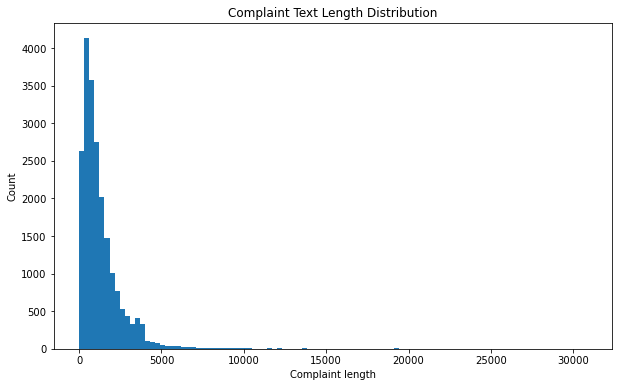

In [102]:
# Write your code here to visualise the data according to the 'Complaint' character length

df_clean['complaint_len'] = df_clean['raw_complaints'].astype(str).apply(len)

plt.figure(figsize=(10,6))
df_clean['complaint_len'].plot.hist(bins=100, title='Complaint Text Length Distribution')
plt.xlabel('Complaint length')
plt.ylabel('Count')
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

In [103]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   raw_complaints         21072 non-null  object
 1   lemmatized_complaints  21072 non-null  object
 2   pos_tag_complaints     21072 non-null  object
 3   complaint_len          21072 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


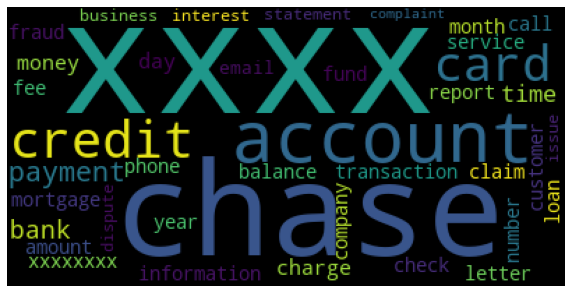

In [104]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
word_cloud = WordCloud(collocations = False, max_words = 40, random_state = 100).generate(" ".join(df_clean["pos_tag_complaints"]))
plt.figure(figsize = (10, 10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [105]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['lemmatized_complaints'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [106]:
#Function to get n-gram frequency data 
def top_n_gram_frequency(ngram_range):
    count_vectorizer = CountVectorizer(stop_words = "english", ngram_range = (ngram_range, ngram_range), max_features = 5000)
    count_matrix = count_vectorizer.fit_transform(df_clean["Complaint_clean"])
    idx = count_matrix.toarray().sum(axis = 0).argsort()[::-1][:30]
    ngram_frequency = pd.DataFrame(count_matrix.toarray().sum(axis = 0)[idx].reshape(1, -1), columns = np.array(count_vectorizer.get_feature_names())[idx])
    return ngram_frequency

In [107]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
unigram_frequency = top_n_gram_frequency(1)
unigram_frequency

,xxxx,chase,account,credit,card,bank,xxxxxxxx,payment,tell,charge,...,loan,ask,close,letter,state,information,use,contact,claim,fee
0,192551,80371,48669,34152,30517,28412,27916,21136,19669,18234,...,11000,10994,10141,9669,9665,9654,9402,9275,9208,8953


In [108]:
#Print the top 10 words in the unigram frequency
unigram_frequency.iloc[0, :10].index

Index(['xxxx', 'chase', 'account', 'credit', 'card', 'bank', 'xxxxxxxx',
       'payment', 'tell', 'charge'],
      dtype='object')

In [109]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigram_frequency = top_n_gram_frequency(2)
bigram_frequency

,xxxx xxxx,credit card,chase bank,xxxx chase,credit report,xxxxxxxx xxxx,customer service,xxxx xxxxxxxx,close account,chase xxxx,...,xxxx account,debit card,bank account,receive letter,number xxxx,xxxx credit,check account,credit score,bank xxxx,xxxxxxxx chase
0,83920,12809,12791,4438,3952,3331,3066,2989,2970,2951,...,2063,2041,1984,1862,1826,1743,1736,1698,1691,1648


In [110]:
#Print the top 10 words in the bigram frequency
bigram_frequency.iloc[0, :10].index

Index(['xxxx xxxx', 'credit card', 'chase bank', 'xxxx chase', 'credit report',
       'xxxxxxxx xxxx', 'customer service', 'xxxx xxxxxxxx', 'close account',
       'chase xxxx'],
      dtype='object')

In [111]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
trigram_frequency = top_n_gram_frequency(3)
trigram_frequency

,xxxx xxxx xxxx,jp morgan chase,chase credit card,xxxx xxxx chase,xxxxxxxx xxxx xxxx,xxxx xxxx xxxxxxxx,chase xxxx xxxx,account xxxx xxxx,chase bank xxxx,xxxx xxxxxxxx xxxx,...,xxxxxxxx xxxxxxxx xxxxxxxx,xxxx xxxx tell,chase customer service,receive letter chase,card xxxx xxxx,xxxx xxxx credit,credit card xxxx,payment xxxx xxxx,contact xxxx xxxx,charge xxxx xxxx
0,40005,2345,2100,1907,1653,1341,1187,1051,1016,991,...,647,606,580,563,560,557,556,535,535,478


In [112]:
#Print the top 10 words in the trigram frequency
trigram_frequency.iloc[0, :10].index

Index(['xxxx xxxx xxxx', 'jp morgan chase', 'chase credit card',
       'xxxx xxxx chase', 'xxxxxxxx xxxx xxxx', 'xxxx xxxx xxxxxxxx',
       'chase xxxx xxxx', 'account xxxx xxxx', 'chase bank xxxx',
       'xxxx xxxxxxxx xxxx'],
      dtype='object')

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [113]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [114]:
#All masked texts has been removed
df_clean.head()

,raw_complaints,lemmatized_complaints,pos_tag_complaints,complaint_len,Complaint_clean
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name xxxx xxxx stop bank service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx thank advance help,475,good morning my name be and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account thank in advance for your help
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account xxxx anniversary date xxxxxxxx consent xxxx recording agent,337,I upgrade my card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account change my anniversary date from to without my consent have the recording of the agent who be mislead I
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant,210,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explain

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [115]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95)


#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [116]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [117]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [118]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)  #write your code here

In [119]:
W = nmf_model.fit_transform(dtm)
H = nmf_model.components_
len(tfidf.get_feature_names())

11830

In [120]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names())
topic_top15_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i}' for i in range(num_topics)],
                columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_top15_words.iloc[i] = words[ix]
topic_top15_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 0,account,check,bank,chase,money,deposit,close,fund,tell,open,branch,say,checking,day,transfer
Topic 1,credit,card,report,inquiry,chase,hard,account,remove,apply,score,company,open,close,debt,information
Topic 2,loan,mortgage,chase,home,modification,property,letter,send,year,request,document,time,foreclosure,bank,rate
Topic 3,charge,card,chase,dispute,transaction,purchase,fee,merchant,refund,claim,receive,fraud,service,use,tell
Topic 4,payment,late,pay,make,balance,fee,month,statement,monthly,day,credit,account,auto,chase,time


- `Topic 0` looks to be `Bank account services`
- `Topic 1` looks to be `Credit card / Prepaid card`
- `Topic 2` looks to be `Mortgages/loans`
- `Topic 3` looks to be `Theft/Dispute reporting`
- `Topic 4` looks to be `Others`

In [121]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
doc_topic = pd.DataFrame(W, columns = [f'Topic {i + 1}' for i in range(num_topics)])
doc_topic["Dominant_Topic"] = doc_topic.apply(lambda x : np.argmax(x), axis = 1)
doc_topic.head()


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Dominant_Topic
0,0.021762,0.011066,0.037595,0.011111,0.002873,2
1,0.005431,0.006502,0.005108,0.009839,0.001055,3
2,0.000000,0.055172,0.003254,0.007867,0.000000,1
3,0.018320,0.054881,0.026187,0.017422,0.000000,1
4,0.063031,0.000000,0.003465,0.000000,0.002333,0


In [122]:
#Assign the best topic to each of the complaints in Topic Column

df_clean['Topic'] = doc_topic["Dominant_Topic"]    #write your code to assign topics to each rows.

In [123]:
df_clean.head()

,raw_complaints,lemmatized_complaints,pos_tag_complaints,complaint_len,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name xxxx xxxx stop bank service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx thank advance help,475,good morning my name be and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account thank in advance for your help,2
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account xxxx anniversary date xxxxxxxx consent xxxx recording agent,337,I upgrade my card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account change my anniversary date from to without my consent have the recording of the agent who be mislead I,3
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant,210,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,1
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and

In [124]:
#Print the first 5 Complaint for each of the Topics
df_clean.groupby('Topic').head(5).sort_values('Topic')

,raw_complaints,lemmatized_complaints,pos_tag_complaints,complaint_len,Complaint_clean,Topic
12,i opened an account with chase bank on xxxx and used a code for xxxx bonus i called to follow up on xxxxxxxx about the terms and was told everything was on the account and once i made xxxx direct deposit the bonus would be paid out in days as of xxxx i had made the required deposits and was told my account never had the coupon code applied and it was past the days to do so so no bonus would be paid,I open an account with chase bank on xxxx and use a code for xxxx bonus I call to follow up on xxxxxxxx about the term and be tell everything be on the account and once I make xxxx direct deposit the bonus would be pay out in day as of xxxx I have make the required deposit and be tell my account never have the coupon code apply and it be past the day to do so so no bonus would be pay,account xxxx code bonus xxxxxxxx term account deposit bonus day xxxx deposit account coupon code day bonus,403,I open an account with chase bank on and use a code for bonus I call to follow up on about the term and be tell everything be on the account and once I make direct deposit the bonus would be pay out in day as of I have make the required deposit and be tell my account never have the coupon code apply and it be past the day to do so so no bonus would be pay,0
4,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,my grand son give I check for I deposit it into my chase account after fund clear my chase bank close my account never pay I my money they say they need to speek with my grand son check be clear money be take by my chase bank refuse to pay I my money my grand son call chase time they tell he I should call not he to verify the check owner he be out the country most the time date happen check number xxxx claim number be xxxx with chase,son check chase account fund chase account money son check money chase bank money son time check owner country time date number xxxx claim number chase,456,my grand son give I check for I deposit it into my chase account after fund clear my chase bank close my account never pay I my money they say they need to speek with my grand son check be clear money be take by my chase bank refuse to pay I my money my grand son call chase time they tell he I should call not he to verify the check owner he be out the country most the time date happen check number claim number be with chase,0
6,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [125]:
#Create the dictionary of Topic names and Topics

Topic_names = {
    0: 'Bank account services',
    1: 'Credit card / Prepaid card',
    2: 'Mortgages/loans',
    3: 'Theft/Dispute reporting',
    4: 'Others'   
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [126]:
df_clean.head()

,raw_complaints,lemmatized_complaints,pos_tag_complaints,complaint_len,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name xxxx xxxx stop bank service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx thank advance help,475,good morning my name be and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account thank in advance for your help,Mortgages/loans
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account xxxx anniversary date xxxxxxxx consent xxxx recording agent,337,I upgrade my card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account change my anniversary date from to without my consent have the recording of the agent who be mislead I,Theft/Dispute reporting
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant,210,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,Credit card / Prepaid card
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not st

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [127]:
#Create the dictionary again of Topic names and Topics

Topic_names = {
    'Bank account services': 0,
    'Credit card / Prepaid card': 1,
    'Mortgages/loans': 2,
    'Theft/Dispute reporting': 3,
    'Others': 4
}
#Replace Topic Names with Topics number
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [128]:
df_clean

,raw_complaints,lemmatized_complaints,pos_tag_complaints,complaint_len,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name xxxx xxxx stop bank service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx thank advance help,475,good morning my name be and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account thank in advance for your help,2
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account xxxx anniversary date xxxxxxxx consent xxxx recording agent,337,I upgrade my card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account change my anniversary date from to without my consent have the recording of the agent who be mislead I,3
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant,210,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,1
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and

In [129]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[["raw_complaints", "Topic"]]

In [130]:
training_data

,raw_complaints,Topic
0,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,2
1,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,3
2,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
3,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
4,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0
...,...,...
21067,after being a chase card customer for well over a decade was offered multiple solicitations for acquiring new credit cards with chase all with bonus airline miles and hotel points was approved for all new cards with no annual fee for year after less than months with payment always paid as agreed chase closed all my cards one of my approved new cards was never activated but was sent to me\n\nchase has done harm to my credit has charged me an annual fee even though they cancelled my account failed to credit my points for both airlines and hotel failed to credit up to for xxxx enrollment and failed to credit airline charge as agreed upon,3
21068,on wednesday xxxxxxxx i called chas my xxxx xxxx visa credit card provider and asked how to make a claim under their purchase protection benefit on xxxxxxxx i purchased three high school textbooks for my xxxx year old daughter because she transferred to a new school all three books were damaged when a water bottle in her backpack broke the chase representative assured me the textbooks 

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [131]:
df_clean.shape

(21072, 6)

In [132]:
# Split into 80 - 20 respectively
X_train, X_test, y_train, y_test = train_test_split(training_data.raw_complaints, training_data.Topic, train_size=0.8, random_state=40)

In [133]:
#Write your code to get the Vector count
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

In [134]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16857, 29997) (16857,)
(4215, 29997) (4215,)


## <font color="maroon">Model Building:</font>

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [135]:
# Write your code here to build any 3 models and evaluate them using the required metrics

#Define a function to check the performance of all above models on test data
#To evaluate we will take below metrics on test data
#Accuracy
#Precision
#recall
#f1_score

#Function will return a DataFrame with all the scores of metrics used.

def calculate_model_peformance(model_name, y_test, y_pred):
    print(f"{model_name} Model Performance Report on Test Data:")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = metrics.precision_score(y_test,y_pred, average='weighted')
    print(f"Precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred, average='weighted')
    print(f"Recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred, average='weighted')
    print(f"F1_score: {f1_score}")
    
    return pd.DataFrame({"Model":[model_name], 
                         "accuracy":[accuracy],
                         "precision":[precision],
                         "recall":[recall],
                         "f1_score":[f1_score]
                         })   
    

#Define a function to Visualize Confusion Matrix of all above models on train data

def visualize_model_train(model_name, model_obj, X_train, y_train):
    #Plot confusion matrix for Model
    print("================================================================================")
    print(f"Confusion Matrix of {model_name} Model on Train Data")
    print("================================================================================")    
    metrics.plot_confusion_matrix(model_obj, X_train, y_train, cmap="Greens")
    plt.show()

#Define a function to Visualize Confusion Matrix of all above models on test data

def visualize_model_test(model_name, model_obj, X_test, y_test):
    #Plot confusion matrix for Model
    print("================================================================================")
    print(f"Confusion Matrix of {model_name} Model on Test Data")
    print("================================================================================")
    metrics.plot_confusion_matrix(model_obj, X_test, y_test, cmap="Greens")   
    plt.show()

# Create a DataFrame which stores all test score for each model
metric_score_df = pd.DataFrame({"Model":[None],
                                "accuracy":[None],
                                "precision":[None],
                                "recall":[None],
                                "f1_score":[None]
                                })


## <font color="green">1. Logistic Regression</font>

Logistic Regression Model Performance Report on Test Data:
Accuracy: 0.9392645314353499
Precision: 0.9394274457512295
Recall: 0.9392645314353499
F1_score: 0.9392219320219786
Confusion Matrix of Logistic Regression Model on Train Data


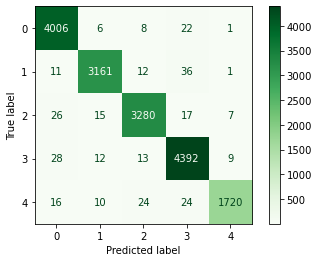

Confusion Matrix of Logistic Regression Model on Test Data


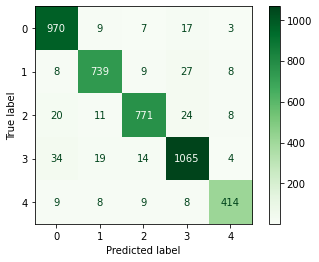

,Model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.939265,0.939427,0.939265,0.939222


In [136]:
#Instantiate logistic regression
lr = LogisticRegression(random_state=42, max_iter=500)

#Fit the algorithm on the data
lr.fit(X_train, y_train)

#Prediction on train data
y_train_pred = lr.predict(X_train)

#Prediction on test data
y_test_pred = lr.predict(X_test)

#check various scores on test data for Logistics Regression Model
df1 = calculate_model_peformance("Logistic Regression", y_test, y_test_pred)


#Plot confusion matrix for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression", lr, X_train, y_train)

#Plot confusion matrix Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression", lr, X_test, y_test)

#Generate a metric score for Logistic Regression
#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.dropna()
metric_score_df = metric_score_df.append(df1)
metric_score_df

## <font color="green">2. Decision Tree</font>

Decision Tree Model Performance Report on Test Data:
Accuracy: 0.7684460260972716
Precision: 0.7685782594771429
Recall: 0.7684460260972716
F1_score: 0.768415947516066
Confusion Matrix of Decision Tree Model on Train Data


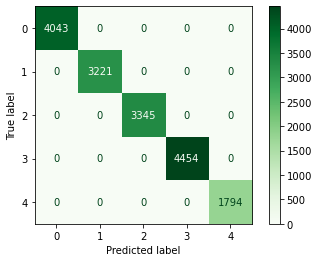

Confusion Matrix of Decision Tree Model on Test Data


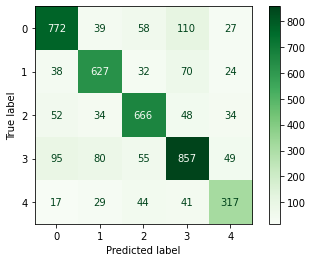

,Model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.939265,0.939427,0.939265,0.939222
0,Decision Tree,0.768446,0.768578,0.768446,0.768416


In [137]:
#Instantiate Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

#Fit the algorithm on the data
dt_clf.fit(X_train, y_train)

#Prediction on train data
y_train_pred = dt_clf.predict(X_train)

#Prediction on test data
y_test_pred = dt_clf.predict(X_test)

#check various scores on test data for Decision Tree Classifier Model
df2 = calculate_model_peformance("Decision Tree", y_test, y_test_pred)


#Plot confusion matrix for Decision Tree Classifier Model on Train Data
visualize_model_train("Decision Tree", dt_clf, X_train, y_train)

#Plot confusion matrix for Decision Tree Classifier Model on Test Data
visualize_model_test("Decision Tree", dt_clf, X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df2)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

## <font color="green">3. Random Forest</font>

Random Forest Model Performance Report on Test Data:
Accuracy: 0.8320284697508897
Precision: 0.8404251722465883
Recall: 0.8320284697508897
F1_score: 0.8267647871282808
Confusion Matrix of Random Forest Model on Train Data


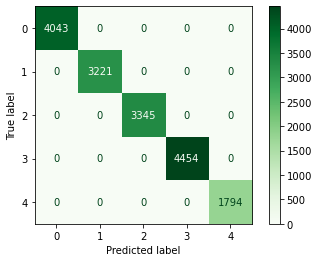

Confusion Matrix of Random Forest Model on Test Data


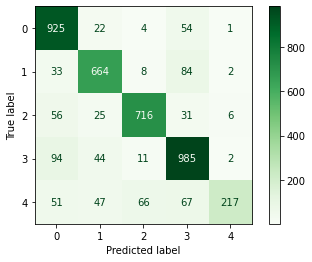

,Model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.939265,0.939427,0.939265,0.939222
0,Decision Tree,0.768446,0.768578,0.768446,0.768416
0,Random Forest,0.832028,0.840425,0.832028,0.826765


In [138]:
#Instantiate Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

#Fit the algorithm on the data
rf_clf.fit(X_train, y_train)

#Prediction on train data
y_train_pred = rf_clf.predict(X_train)

#Prediction on test data
y_test_pred = rf_clf.predict(X_test)

#check various scores on test data for Random Forest Classifier Model
df3 = calculate_model_peformance("Random Forest", y_test, y_test_pred)


#Plot confusion matrix for Random Forest Classifier Model on Train Data
visualize_model_train("Random Forest", rf_clf, X_train, y_train)

#Plot confusion matrix for Random Forest Classifier Model on Test Data
visualize_model_test("Random Forest", rf_clf, X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df3)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

## <font color="green">4. Multinomial Naive Bayes classifier</font>

Multinomial Naive Bayes Model Performance Report on Test Data:
Accuracy: 0.8320284697508897
Precision: 0.8404251722465883
Recall: 0.8320284697508897
F1_score: 0.8267647871282808
Confusion Matrix of Multinomial Naive Bayes Model on Train Data


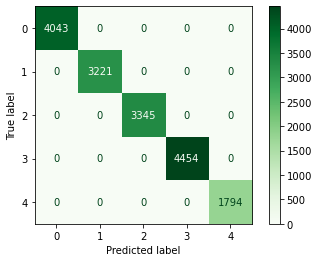

Confusion Matrix of Multinomial Naive Bayes Model on Test Data


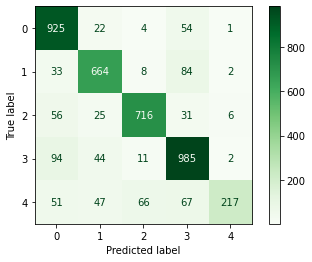

,Model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.939265,0.939427,0.939265,0.939222
0,Decision Tree,0.768446,0.768578,0.768446,0.768416
0,Random Forest,0.832028,0.840425,0.832028,0.826765
0,Multinomial Naive Bayes,0.832028,0.840425,0.832028,0.826765


In [139]:
#Instantiate Multinomial Naive Bayes classifier
mnb_clf = RandomForestClassifier(random_state=42)

#Fit the algorithm on the data
mnb_clf.fit(X_train, y_train)

#Prediction on train data
y_train_pred = mnb_clf.predict(X_train)

#Prediction on test data
y_test_pred = mnb_clf.predict(X_test)

#check various scores on test data for Multinomial Naive Bayes classifier Model
df4 = calculate_model_peformance("Multinomial Naive Bayes", y_test, y_test_pred)


#Plot confusion matrix for Multinomial Naive Bayes classifier Model on Train Data
visualize_model_train("Multinomial Naive Bayes", mnb_clf, X_train, y_train)

#Plot confusion matrix for Multinomial Naive Bayes classifier Model on Test Data
visualize_model_test("Multinomial Naive Bayes", mnb_clf, X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df4)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

<font color="maroon">Based on the above result, we can conclude that the **Logistic Regression model** gives a better f1-score, Precision and Recall, and also Accuracy Scores are very good.</font>

## <font color="maroon">Model inference:</font>

In [140]:
#Sample text to predict the Topic
sample_txt1 = 'chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant'
sample_txt2 = 'good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help'

In [141]:
#Transform using the existing count_vect
sample_txt1_X = count_vect.transform([sample_txt1])
sample_txt2_X = count_vect.transform([sample_txt2])

In [142]:
#Transform using the existing tfidf_transformer
sample_txt1_tfidf = tfidf_transformer.transform(sample_txt1_X)
sample_txt2_tfidf = tfidf_transformer.transform(sample_txt2_X)

In [143]:
#Predict the topic using logistic regression
y_sample_txt1_topic_pred = lr.predict(sample_txt1_tfidf)
y_sample_txt2_topic_pred = lr.predict(sample_txt2_tfidf)

In [144]:
print(y_sample_txt1_topic_pred)
print(y_sample_txt2_topic_pred)

[1]
[2]


### The model has correctly predicted 1 which is Credit card or prepaid card.
### The model has correctly predicted 2 which is Mortgages or loans.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <font color=green>End of Automatic Ticket Classification Case Study Assignment</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**